1. Finish and expand the scripts we started in class to (1) calculate the first 5 modal frequencies of a 60 cm diameter circular membrane and (2) plot the shape $z(x,y,t)$ at 100 ms, 250 ms, and 1 s. The membrane has a thickness of 1.2 mm, average mass density of 1200 kg/m3, and tension of 500 N.

$Z_{m,n}(r,\theta,t)=C_{m,n}J_m(k_{m,n}r)cos(m\theta)e^{j\omega_{m,n}t}=C_{m,n}J_m(k_{m,n}r)cos(m\theta)cos(\omega_{m,n}t)$

(Assume only the real displacement is valid) 

$f_{m,n}=\frac{j_{m,n}c}{2\pi R}$

$\omega_{m,n} = 2\pi f$

$k_{m,n}=\frac{\omega}{c}$

In [2]:
import numpy as np
from scipy.special import *
import matplotlib.pyplot as plt


#jn_zeros(order, num roots) 
#jv(order, argument)

def Z(m,n,r,theta,t):
    return jv(m,n)*np.cos(m*theta)*np.cos(omegaRange[m-1,n-1]*t)

R=0.3
th=1.2/1000
rho=1200
tension=500
tRange=[0.1,0.25,1]
c=np.sqrt(tension/(rho*th*R))

r, theta = np.mgrid[0.1:1:10j, 0:360:20j]


numModes=5
jRange=np.zeros((numModes,numModes))

for m in range(1,1+numModes):
    jRange[m-1,:]=jn_zeros(m,numModes)

fRange=jRange*c/(2*np.pi*R)
omegaRange=2*np.pi*fRange

print("First 5x5 mode frequencies: ")
print(fRange)
print(np.amin(fRange))

First 5x5 mode frequencies: 
[[ 69.15668723 126.62107605 183.61621672 240.47314776 297.27077697]
 [ 92.69046947 151.91894286 209.72113409 267.04528416 324.14846785]
 [115.15258846 176.17218776 234.90533264 292.80983033 350.31155014]
 [136.9584797  199.70181932 259.40326084 317.9424162  375.89567144]
 [158.31245077 222.6937552  283.36517381 342.56364976 400.99878495]]
69.15668722774947


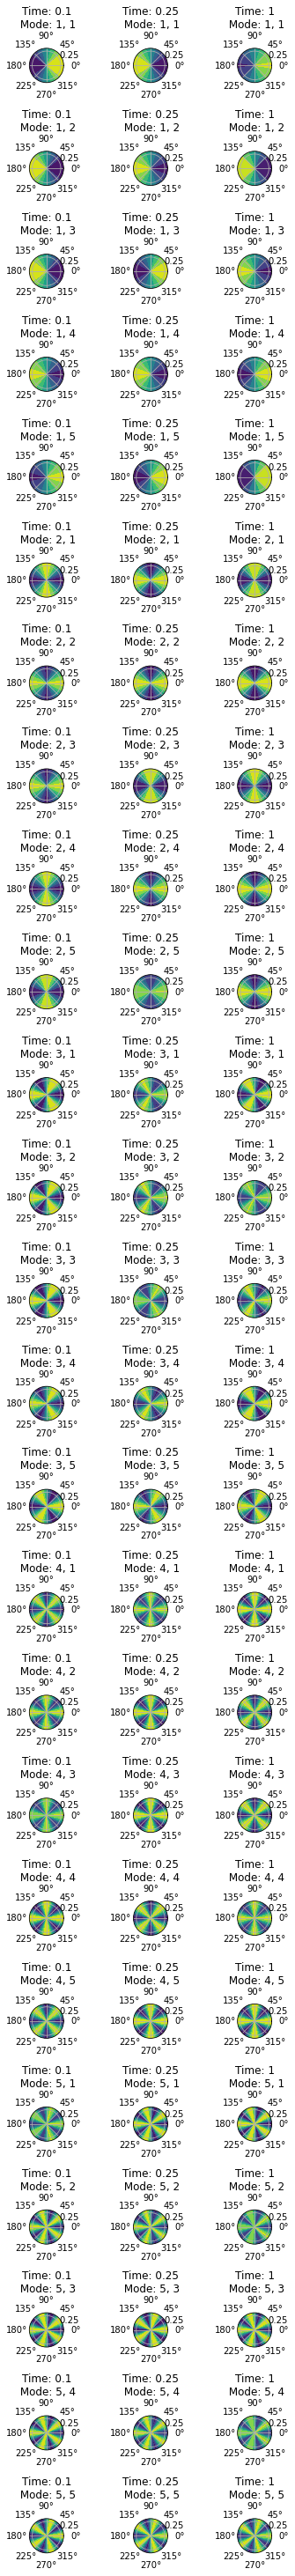

In [3]:
rRange = np.linspace(0, R, 50)
thetaRange = np.linspace(0, 2*np.pi, 50)
r, theta = np.meshgrid(rRange,thetaRange)

fig,ax=plt.subplots(numModes**2,len(tRange),subplot_kw=dict(projection='polar'))

for m in range(1, numModes+1):
    for n in range(1, numModes+1):
        for tIdx in range(0,len(tRange)):
            ax[(m-1)*(numModes)+n-1, tIdx].contourf(theta, r, Z(m,n,r,theta,tRange[tIdx]))
            ax[(m-1)*(numModes)+n-1, tIdx].set_title("Time: " +str(tRange[tIdx]) + "\n Mode: " + str(m) +", "+str(n)+"\n")

plt.subplots_adjust(top=10, hspace=2)

fig.savefig("A:/mode_shapes.png")

plt.show()


2. Garrett: 6.13

Condenser microphone with a stretched stainless-steel diaphragm. The 0.2% yield strength of stainless-steel alloy 316 at room temperatures is 290 MPa, and its mass density is ρ = 7990 kg/m3. A condenser microphone diaphragm made from that alloy has a diameter of 3.0 cm and is 0.001" (25 microns) thick.

(a) Maximum tension/length. Calculate the tension per unit length that would stretch the stainless
to its 0.2% yield limit.

(b) Transverse wave speed. Calculate the transverse wave speed of the diaphragm when
stretched to its 0.2% limit.

(c) Fundamental frequency. Calculate the fundamental normal mode frequency f0,1 for that diaphragm.

(d) Open-circuit sensitivity. If a backplate of optimum radius is placed 25 microns from the diaphragm and is polarized by Vbias = 200 Vdc, what will be the low-frequency (i.e., ka < 1) sensitivity of this microphone? Report your result in both V/Pa and in dB re: 1 V/Pa

$|M_{oc}|=V_{bias}\frac{a^2(1-\frac{b}{2a^2})}{4h_0J}$

In [7]:
R=1.5/100
th=25*0.000001
rho=7990
h0=25*0.000001
vBias=200
stress=290e6

tension=stress * (np.pi*R*2*th)

print("Tension, N/m: " + str(tension))

c=np.sqrt(tension/(rho*th*R))

print("Transverse wave speed: " +str(c))

fFund=jRange[0,1]*c/(2*np.pi*R)
omega=2*np.pi*fFund

print("Fundamental frequency, hz: " + str(fFund))

#Equation 6.72
bR=0.8165*R

sens=vBias*((R**2*(1-(bR**2/(2*R**2))))/4*h0*tension)

print("Sensitivity, V/Pa: " + str(sens))
print("Sensitivity, decibel: " + str(10*np.log10(sens)))

Tension, N/m: 683.2964021557799
Transverse wave speed: 477.5463648154444
Fundamental frequency, hz: 35547.446583501725
Sensitivity, V/Pa: 0.00012811753890976796
Sensitivity, decibel: -38.923914125634234
